# Stock Market Prediction And Forecasting Using Stacked LSTM


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

# Data Preprocessing
Import data from link, of stock market

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


Checking for null value

In [5]:
data.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

So we are working on open price of day in stock exchange

In [6]:
df= data.reset_index()['Open']
print(df)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


Text(0.5, 1.0, 'Open')

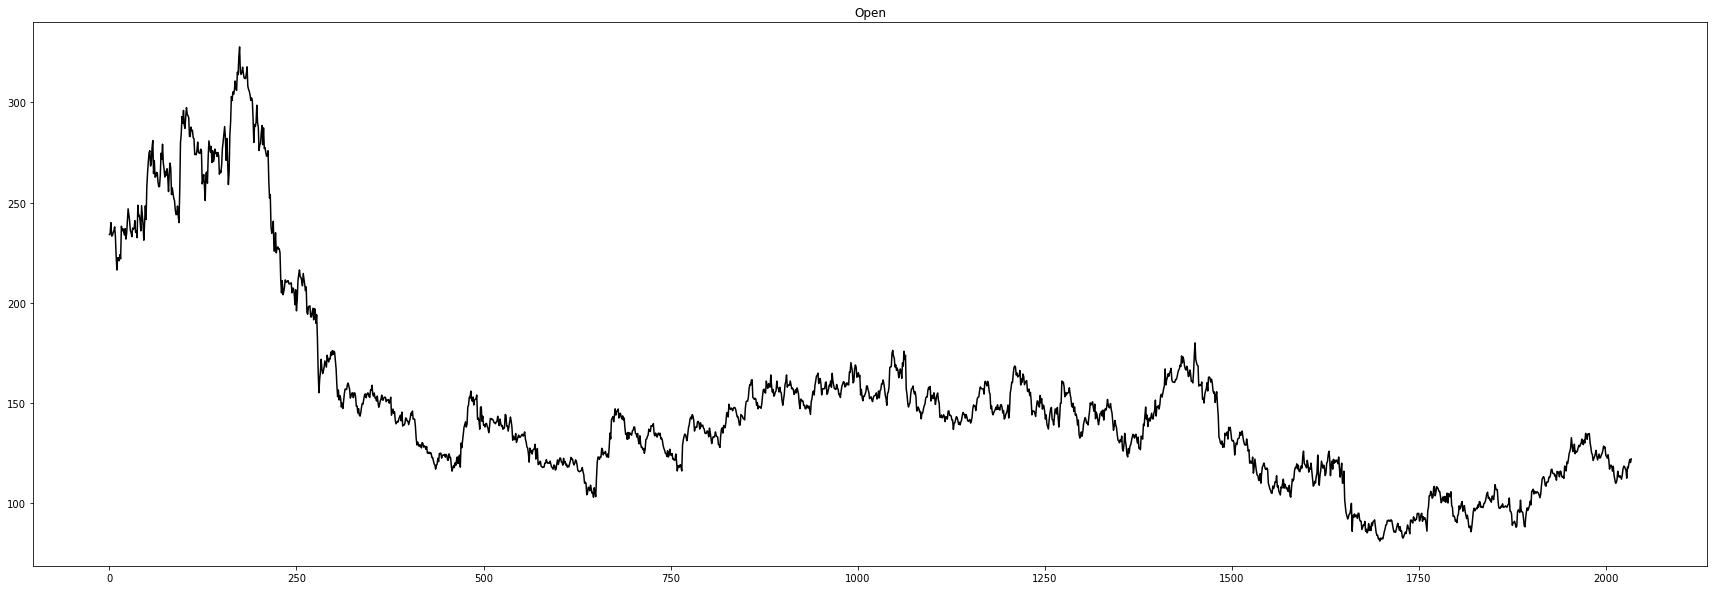

In [7]:
plt.subplots(figsize = (30,10))
plt.plot(df , color ="black")
plt.title("Open")

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [9]:
print(df)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


### data splitting in train data and test data

In [10]:
training_size = int( len(df) * 0.75)
testing_size  = len(df) - training_size
train_data , test_data = df[0 : training_size, :], df[training_size : len(df), :1]
training_size , testing_size

(1526, 509)

In [11]:
train_data , test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

###  convert array of values into dataset

In [12]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

In [13]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

### Reshape the input to be [samples, time steps, features] which is the requirement of LSTM

In [14]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [15]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 21s 316ms/step - loss: 0.0202 - val_loss: 0.0085
Epoch 2/100
23/23 [==============================] - 6s 253ms/step - loss: 0.0026 - val_loss: 9.9104e-04
Epoch 3/100
23/23 [==============================] - 5s 238ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4/100
23/23 [==============================] - 5s 238ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 5s 234ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 6s 241ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 5s 237ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/100
23/23 [==============================] - 5s 230ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/100
23/23 [==============================] - 5s 231ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/100
23/23 [==============================] - 5s 234ms/step - loss: 0.0010 - v

23/23 [==============================] - 5s 228ms/step - loss: 3.0703e-04 - val_loss: 1.7684e-04
Epoch 77/100
23/23 [==============================] - 5s 229ms/step - loss: 3.3933e-04 - val_loss: 2.1901e-04
Epoch 78/100
23/23 [==============================] - 5s 228ms/step - loss: 3.5496e-04 - val_loss: 1.6973e-04
Epoch 79/100
23/23 [==============================] - 5s 228ms/step - loss: 2.8192e-04 - val_loss: 1.8832e-04
Epoch 80/100
23/23 [==============================] - 5s 231ms/step - loss: 2.5081e-04 - val_loss: 1.9451e-04
Epoch 81/100
23/23 [==============================] - 5s 229ms/step - loss: 2.2765e-04 - val_loss: 2.1944e-04
Epoch 82/100
23/23 [==============================] - 6s 253ms/step - loss: 2.2430e-04 - val_loss: 1.9468e-04
Epoch 83/100
23/23 [==============================] - 6s 282ms/step - loss: 2.3977e-04 - val_loss: 2.6786e-04
Epoch 84/100
23/23 [==============================] - 6s 256ms/step - loss: 2.4469e-04 - val_loss: 1.9056e-04
Epoch 85/100
23/23 [===

In [19]:
#Lets predict and check performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [20]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print('RMSE performance matrics : ',math.sqrt(mean_squared_error(y_train, train_predict)) )

RMSE performance matrics :  161.63625183117918


In [21]:
print("Test data RMSE : ",math.sqrt(mean_squared_error(y_test , test_predict)) )

Test data RMSE :  105.19480713854371


In [22]:
#Shift train prediction for plotting

look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

### Plot baseline



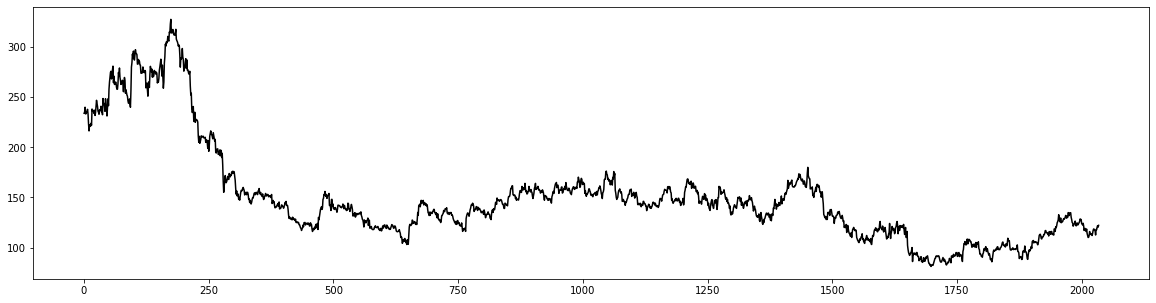

In [23]:
plt.subplots(figsize=(20,5))
plt.plot(scaler.inverse_transform(df), color= 'black')
plt.show()

### Training Prediction and Testing Prediction



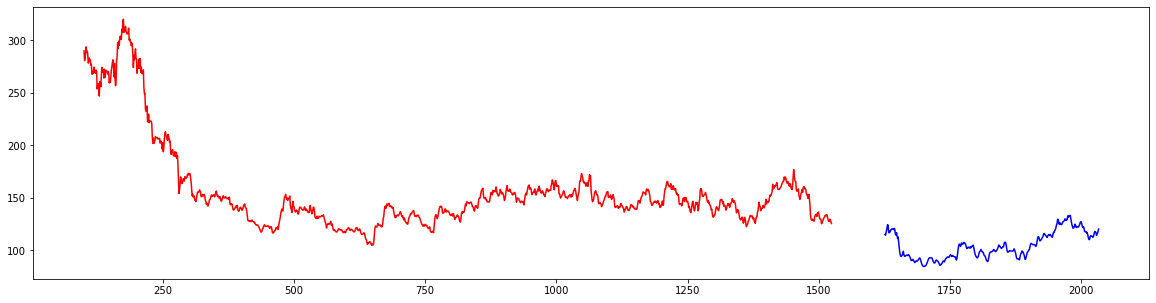

In [24]:
plt.subplots(figsize=(20,5))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

### Baseline and train, test prediction



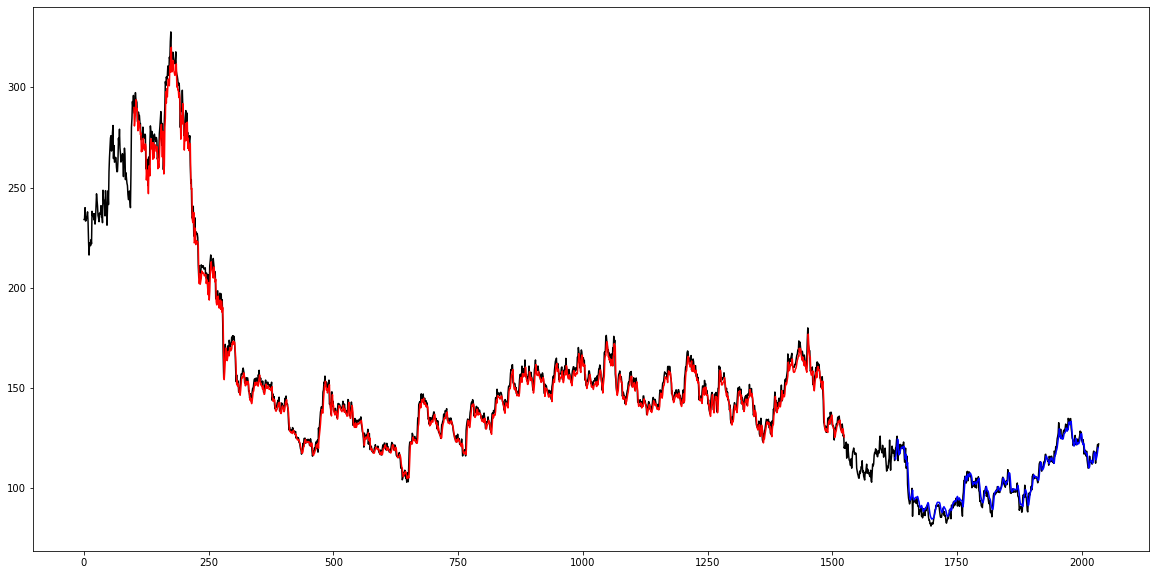

In [25]:
plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(df), color= 'black')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

In [26]:
print("Length of test data : ", len(test_data))

Length of test data :  509


In [27]:
test_data.shape

(509, 1)


now taking previous 100 days data from test data prediction of future data i.e. 
#### 509 - 100 = 409


In [28]:
x_ip = test_data[409:].reshape(1,-1)
x_ip.shape

(1, 100)

In [30]:
temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [31]:
lst_output=[]
n_steps=100

future_Days= 15

i=0

while(i<future_Days):
    
    if(len(temp_ip)>100):
        x_ip = np.array(temp_ip[1:])
        print("Day {} input {}".format(i,x_ip))
        
        x_ip = x_ip.reshape(1,-1)
        x_ip = x_ip.reshape((1, n_steps, 1))
        yhat = model.predict(x_ip, verbose=0)
        print("Day {} output {}\n".format(i,yhat))
        
        temp_ip.extend(yhat[0].tolist())
        temp_ip = temp_ip[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_ip = x_ip.reshape((1, n_steps,1))
        yhat = model.predict(x_ip, verbose=0)
        print(yhat[0])
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16174905]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

Day 8 output [[0.14654914]]

Day 9 input [0.1269262  0.15166261 0.15004055 0.14193025 0.16017843 0.15693431
 0.16504461 0.1770073  0.18146796 0.18815896 0.20924574 0.19424169
 0.18106245 0.18207624 0.1960665  0.17680454 0.18207624 0.18004866
 0.18207624 0.18876723 0.19383617 0.19099757 0.19505272 0.19809408
 0.20640714 0.19748581 0.19525547 0.20437956 0.19870235 0.21796431
 0.21553122 0.20600162 0.21654501 0.21654501 0.2175588  0.19870235
 0.19018654 0.17802109 0.175588   0.16301703 0.16707218 0.17112733
 0.17639903 0.18349554 0.1717356  0.16423358 0.16991079 0.17619627
 0.16788321 0.16909976 0.17396594 0.17741281 0.18268451 0.19221411
 0.18896999 0.19018654 0.17396594 0.17092457 0.16788321 0.17477697
 0.16443633 0.14557989 0.15287916 0.15369019 0.15044607 0.14152474
 0.15145985 0.13341444 0.12530414 0.11719384 0.11780211 0.12489862
 0.14132198 0.13098135 0.12935929 0.13240065 0.12895377 0.12530414
 0.13381995 0.14557989 0.15166261 0.15085158 0.14679643 0.14355231
 0.12733171 0.1496350

In [32]:
for i in range(0,future_Days):
    print("Day {} output{}".format(i,lst_output[i]))

Day 0 output[0.16174905002117157]
Day 1 output[0.16056600213050842]
Day 2 output[0.15856143832206726]
Day 3 output[0.15635065734386444]
Day 4 output[0.15414410829544067]
Day 5 output[0.15203382074832916]
Day 6 output[0.1500592678785324]
Day 7 output[0.1482323706150055]
Day 8 output[0.14654913544654846]
Day 9 output[0.1449972689151764]
Day 10 output[0.14356137812137604]
Day 11 output[0.14222604036331177]
Day 12 output[0.14097782969474792]
Day 13 output[0.1398058384656906]
Day 14 output[0.13870184123516083]


In [33]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

In [34]:
fd = df.tolist()
fd.extend(lst_output)

In [35]:
len(df)

2035

In [36]:
2035-100

1935

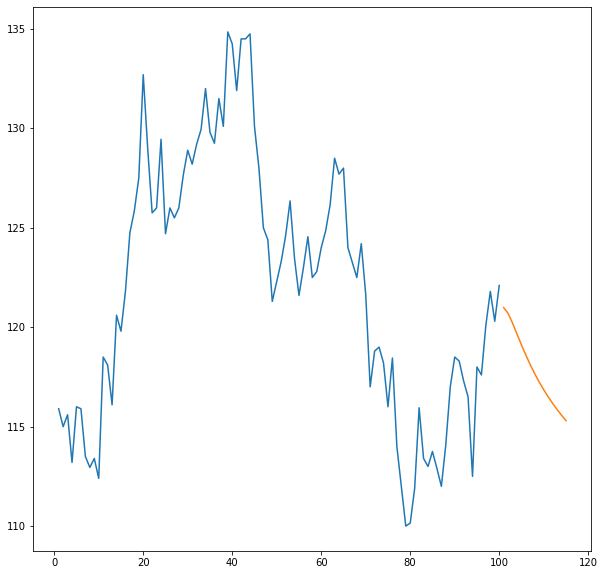

In [37]:
plt.subplots(figsize = (10,10))
plt.plot(day_new, scaler.inverse_transform(df[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))